## Analise de Ruidos em Regressao

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

dados_adv = pd.read_csv('dados/Advertising.csv', index_col=0)
dados_por = pd.read_csv('dados/Portland_housePrices.csv', index_col=None)


### Treine modelos lineares na base <i>Portland_housePrices.csv</i> utilizando apenas um dos atributos preditores.

In [60]:
X = dados_por.loc[:,['quartos']]
y = dados_por.loc[:,['preco']]
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_model = lr.fit(X_train, y_train)

In [62]:
predicted = lr.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, classification_report

In [64]:
print(mean_squared_error(y_test,predicted), mean_absolute_error(y_test,predicted))

27045958032.980972 130110.80441046099


In [65]:
X = dados_por.loc[:,['quartos']]
y = dados_por.loc[:,['preco']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
predicted = lr.predict(X_test)

from sklearn.metrics import r2_score

def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

rss = calc_rss(y_test,lr.predict(X_test))
r2 = calc_r2(y_test,lr.predict(X_test))

print(rss)
print(r2)


432735328527.69556
-20.261650884923743


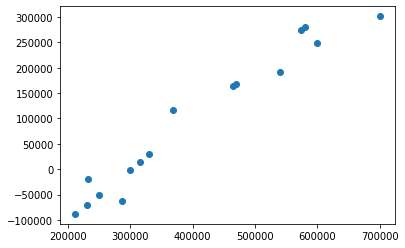

In [66]:
#PLOT DO ERRO
plt.scatter(y_test, y_test - predicted)
plt.show()

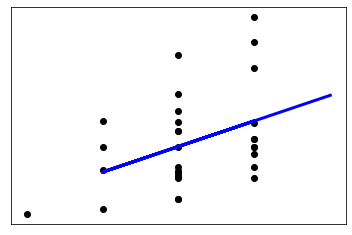

In [67]:
#dados de teste (X_test, y_test)
plt.scatter(X_train, y_train,  color='black')
#Qual foi a predicao do algorirmo
plt.plot(X_test, predicted, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

###  Treine modelos lineares na base <i>Advertising.csv</i> utilizando apenas um dos atributos preditores.

In [68]:
colunas = dados_adv.columns
colunas

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [69]:
print('Correlacao de {} com Sales: {}'.format(colunas[0] ,dados_adv[colunas[0]].corr(dados_adv['sales'])))

Correlacao de TV com Sales: 0.7822244248616061


In [70]:
print('Correlacao de {} com Sales: {}'.format(colunas[1] ,dados_adv[colunas[1]].corr(dados_adv['sales'])))

Correlacao de radio com Sales: 0.5762225745710551


In [71]:
print('Correlacao de {} com Sales: {}'.format(colunas[2] ,dados_adv[colunas[2]].corr(dados_adv['sales'])))

Correlacao de newspaper com Sales: 0.22829902637616528


In [72]:
X = dados_adv.loc[:,['TV']]
y = dados_adv[['sales']]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
resultado = lr2.predict(X_test)

def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

rss = calc_rss(y_test,lr.predict(X_test))
r2 = calc_r2(y_test,lr.predict(X_test))

print('RSS: ', rss)
print('r2', r2)

RSS:  3991946597933022.0
r2 -2.1517437168202758


# Verificando Residuos

A analise de residuo:
https://stattrek.com/regression/residual-analysis.aspx

Os resíduos são estimativas do erro experimental obtido subtraindo as respostas observadas (y_test) das respostas previstas (resultado).  

A resposta prevista é calculada a partir do modelo escolhido, depois que todos os parâmetros desconhecidos do modelo foram estimados a partir dos dados experimentais.  

O exame de resíduos é uma parte essencial de toda a modelagem estatística, incluindo as EODs. Uma análise cuidadosa dos resíduos pode nos dizer se nossas suposições são razoáveis e se nossa escolha de modelo é apropriada.  

Como essa é uma forma de erro, as mesmas premissas gerais se aplicam ao grupo de resíduos que normalmente usamos para erros em geral: espera-se que sejam (aproximadamente) normais e (aproximadamente) independentemente distribuídos com uma média de 0 e alguma constante variação.

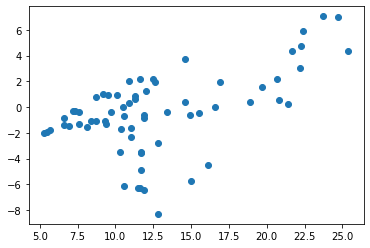

In [74]:
# PLOT de ERRO
plt.scatter(y_test, y_test - resultado)
plt.show()
#classification_report(y_test, resultado)

# Analise de Residuo
#### O modelo acima tem problemas: O eixo y de erro (y verdadeiro menos predito) ao longo de X mostra:  
1. Desbalanceamento dos dados
    * Muitos dados concentrados no primeiro e segundo quartil, isso traz desbalanceamento no modelo.  
        * A solucao seria pedir para o cliente enviar mais dados do 3 e 4 quartil.  
        * A segunda solucao seria classifiar os dados em quatro partes, verificar, pegar uma amostra do 1 e 2 quartis que sejam do tamanho aproximado do tamanho dos dados do 3 e 4 quartis.  
2. Normalidade dos Dados  
    * Espera-se que a distribuicao do erro ao longo de X esteja em torno de 0 (NORMALIZAR DADOS)(Conforme grafico abaixo Residuals vs Fitted), porem no grafico acima ha valores concentrados de erros muito acima. Verifica-se que o modelo erra muito para valores entre 22.5 e 25 e entre 10 e 15.  
    ![optional caption text](figures/lm.png)  
    * A figura abaixo mostra no segundo grafico QQ (Quantil/Quantil) abaixo que o ERRO nao corresponde a uma distribuicao normal  
    * A distribuicao do ERRO deve ser NORMAL, entretanto os dados originais podem se enquadrar em qualquer distribuicao.
    ![](figures/lm2.png)  
      
    A “good” residuals vs. fitted plot should be relatively shapeless without clear patterns in the data, no obvious outliers, and be generally symmetrically distributed around the 0 line without particularly large residuals.  
    https://medium.com/data-distilled/residual-plots-part-1-residuals-vs-fitted-plot-f069849616b1  
      
    The normal qq plot helps us determine if our dependent variable is normally distributed by plotting quantiles (i.e. percentiles) from our distribution against a theoretical distribution. If our data is normally distributed, it will be plotted in a generally straight line on the qq plot.  
    https://medium.com/data-distilled/residual-plots-part-2-normal-qq-plots-c220ee9ed9fc  
      
      The Scale-Location plot shows whether our residuals are spread equally along the predictor range, i.e. homoscedastic. We want the line on this plot to be horizontal with randomly spread points on the plot.  
      https://medium.com/data-distilled/residual-plots-part-3-scale-location-plot-113e469b99c  
        
        The Residuals vs. Leverage plots helps you identify influential data points on your model. Outliers can be influential, though they don’t necessarily have to it and some points within a normal range in your model could be very influential. The points we’re looking for(or not looking for) are values in the upper right or lower right corners, which are outside the red dashed Cook’s distance line. These are points that would be influential in the model and removing them would likely noticeably alter the regression results.  
    https://medium.com/data-distilled/residual-plots-part-4-residuals-vs-leverage-plot-14aeed009ef7

###  Exemplo de distribuicao de ERRO uniforme (NAO E O QUE SE ESPERA ENCONTRAR EM DADOS REAIS)

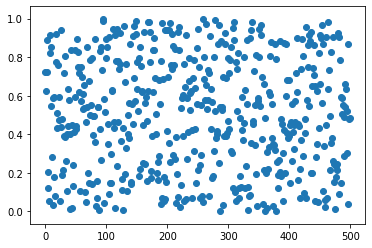

In [75]:
import numpy as np
x = np.arange(500)
y = np.random.random(500)
plt.scatter(x, y)
plt.show()

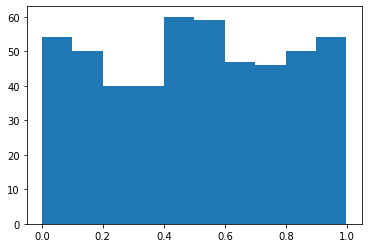

In [76]:
import numpy as np
plt.hist(y)
plt.show()

### Exemplo de distribuicao de ERRO normal dos dados (E O QUE SE ESPERA ENCONTRAR)   


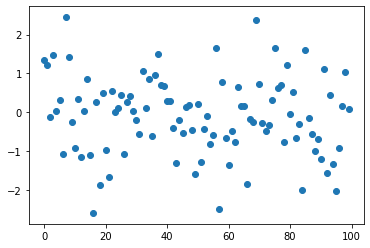

In [77]:
import numpy as np
x = np.arange(100)
y = np.random.normal(loc=0, scale=1, size=100)
plt.scatter(x, y)
plt.show()

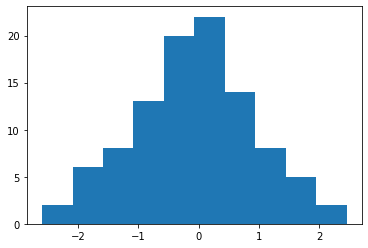

In [78]:
import numpy as np
plt.hist(y)
plt.show()

# Regressão Linear Multivariada
A classe <i>LinearRegression</i> já está implementada de modo a funcionar com múltiplos atributos preditores.

Também é possível utilizar o método de <i>Descida de Gradiente</i> através da classe <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html'>SGDRegressor</a>:
    


In [79]:
from sklearn.linear_model import SGDRegressor
reg_grad = SGDRegressor(max_iter=5000,alpha=0) #alpha = 0 significa que o modelo nao usa regularização (a ser explicado nas próximas aulas)
reg_grad.fit(X_train,y_train.values.ravel())

SGDRegressor(alpha=0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Text(0, 0.5, 'Preço')

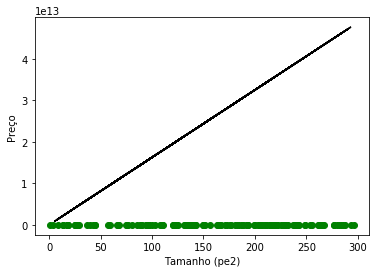

In [80]:
plt.scatter(X_train,y_train,color='g')
plt.plot(X_test, reg_grad.predict(X_test),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

<b>Entretanto</b>... o algoritmo não aprende quando os dados são usados diretamente.

<b>Por quê?</b>

A escala dos dados atrapalha o algoritmo. Tente treinar o regressor linear com descida do gradiente <i>depois de normalizar os dados de entrada</i>.

### Para cada um dos conjuntos de treinamento, utilize a função <i>fit</i> múltiplas vezes considerando apenas <i>um</i> atributo preditor.

1) O modelo aprendido muda a cada vez que a função <i>fit</i> é utilizada?

2) Os modelos finais aprendidos são os mesmos da outra implementação de regressão linear?


Text(0, 0.5, 'Preço')

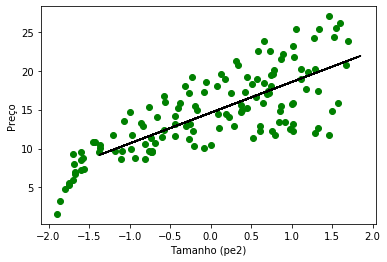

In [81]:
from sklearn.preprocessing import scale
X_train = pd.DataFrame(scale(X_train))
X_test = pd.DataFrame(scale(X_test))
reg_grad = SGDRegressor(max_iter=5000,alpha=0) #alpha = 0 significa que o modelo nao usa regularização (a ser explicado nas próximas aulas)
reg_grad.fit(X_train,y_train.values.ravel())
predicted = reg_grad.predict(X_test)
plt.scatter(X_train,y_train,color='g')
plt.plot(X_test, predicted,color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

In [82]:
reg_grad.coef_

array([3.95144503])

### Aprenda modelos utilizando todos os atributos de entrada.

1) Baseado no RSS e no R^2, é possível obter um modelo melhor utilizando todos os dados?

2) Existem atributos que poderiam ser desconsiderados sem que fosse afetada a precisão?

3) Qual implementação treina mais rápido? A com método dos mínimos quadrados ou a com descida de gradiente?


In [83]:
dados_adv.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [84]:
X = dados_adv.drop('sales', axis=1)
y = dados_adv['sales']
X.head().T

,1,2,3,4,5
TV,230.1,44.5,17.2,151.5,180.8
radio,37.8,39.3,45.9,41.3,10.8
newspaper,69.2,45.1,69.3,58.5,58.4


In [85]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
predicted = lr.predict(X_test)

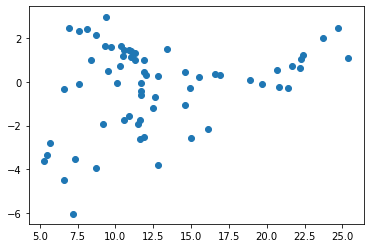

In [90]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test - predicted)

In [91]:
from sklearn.metrics import r2_score

def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

rss = calc_rss(y_test,lr.predict(X_test))
r2 = calc_r2(y_test,lr.predict(X_test))

print('RSS: ', rss)
print('r2', r2)

RSS:  246.0432698249794
r2 0.8436792850166145


* In statistics, the residual sum of squares (RSS), also known as the sum of squared residuals (SSR) or the sum of squared estimate of errors (SSE), is the sum of the squares of residuals (deviations predicted from actual empirical values of data). It is a measure of the discrepancy between the data and an estimation model. A small RSS indicates a tight fit of the model to the data. It is used as an optimality criterion in parameter selection and model selection.